In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
import tensorflow as tf
import keras.layers
#from keras.layers import Dense, Activation, Dropout, Flatten
#from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
import keras.utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image
import warnings
warnings.filterwarnings("ignore")



In [5]:
images = np.load(r"C:\Users\jesse\OneDrive\Desktop\images.npy")

In [7]:
labels = pd.read_csv(r"C:\Users\jesse\OneDrive\Desktop\labels.csv")

In [9]:
labels = labels.to_numpy()

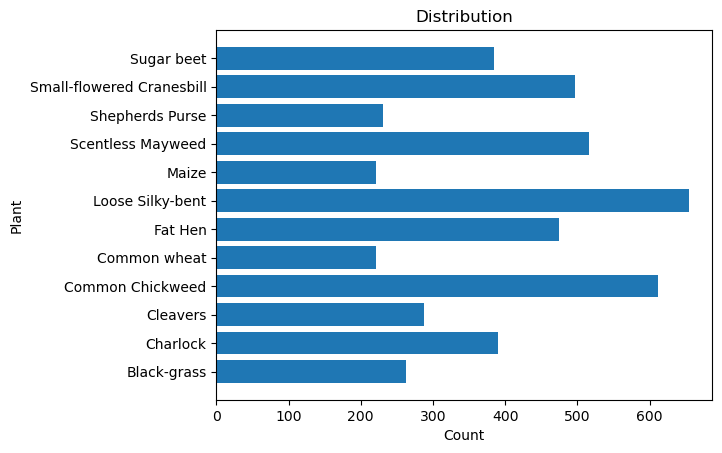

In [11]:
# Sample data

# Get unique values and their counts
unique_values, counts = np.unique(labels, return_counts=True)

# Create the bar graph
plt.barh(unique_values, counts)
plt.xlabel('Count')
plt.ylabel('Plant')
plt.title('Distribution')
plt.show()

In [13]:
unique_values, indices = np.unique(labels, return_index=True)

In [15]:
print(unique_values, indices)

['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet'] [3833 2034 2424 1423 1202  496 4096 3612 2711  971    0 3227]


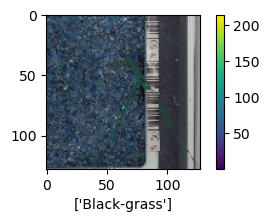

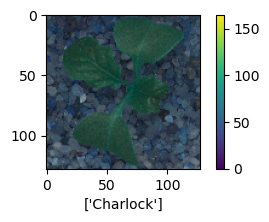

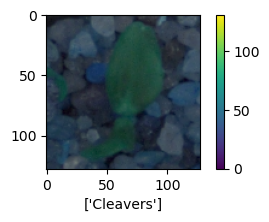

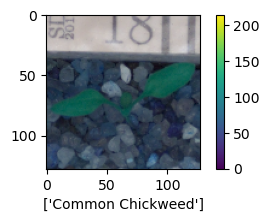

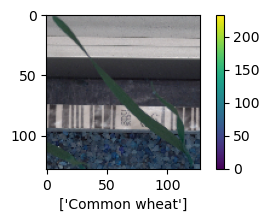

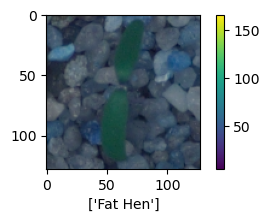

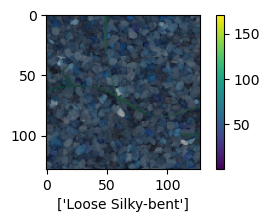

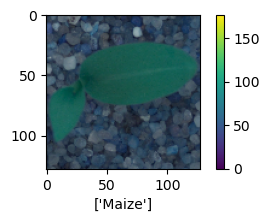

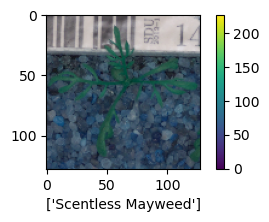

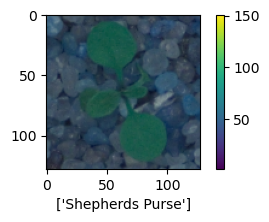

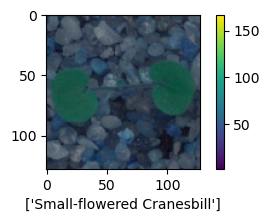

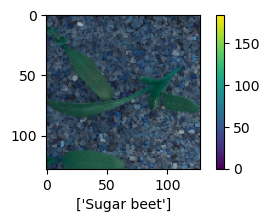

In [17]:
import matplotlib.pyplot as plt

list = [3833, 2034, 2424, 1423, 1202, 496, 4096, 3612, 2711, 971,0, 3227]

for i in list:
    plt.figure(figsize=(4,2))
    plt.imshow(images[i])
    plt.xlabel(labels[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10, 
        brightness_range=[0.2,1.2], # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True) # brightness

In [19]:
from sklearn.preprocessing import LabelBinarizer



In [21]:
images = images.astype('float32') / 255.0

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [25]:
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=12)

In [27]:
lb = LabelBinarizer()
lb.fit(labels)
lb.transform(labels)

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
lb1 = LabelBinarizer()
lb1.fit(y_train)
y_train = lb1.transform(y_train)

In [31]:
print(y_train)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
lb2 = LabelBinarizer()
lb2.fit(y_test)
y_test = lb2.transform(y_test)

In [35]:
lb3 = LabelBinarizer()
lb3.fit(y_valid)
y_valid = lb3.transform(y_valid)

In [37]:
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Dropout(0.5),
#tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(12, activation='softmax')])

In [37]:
model.compile(optimizer=Adam(learning_rate=.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1)

In [41]:
#model.fit(datagen.flow(X_train, y_train), epochs=10, callbacks=[early_stopping])

model1 = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.2215 - loss: 2.3276 - val_accuracy: 0.4656 - val_loss: 1.6115
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.4723 - loss: 1.5230 - val_accuracy: 0.5596 - val_loss: 1.3114
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.5973 - loss: 1.1587 - val_accuracy: 0.6157 - val_loss: 1.1277
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6687 - loss: 0.9717 - val_accuracy: 0.6480 - val_loss: 1.0675
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7141 - loss: 0.8430 - val_accuracy: 0.6718 - val_loss: 0.9838
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7713 - loss: 0.7191 - val_accuracy: 0.6830 - val_loss: 0.9534
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8113 - loss: 0.6211 - val_accuracy: 0.6872 - val_loss: 0.9140
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8486 - loss: 0.4788 - val_acc

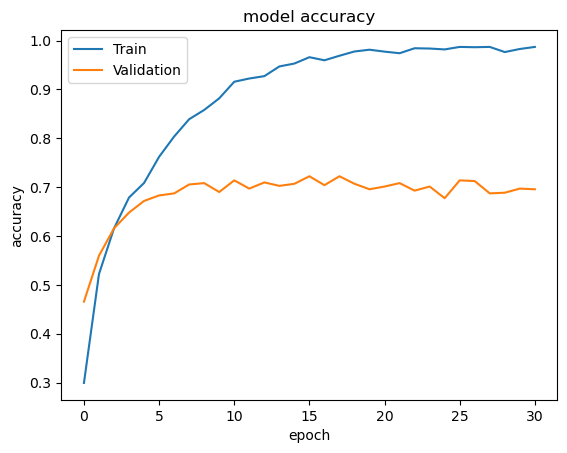

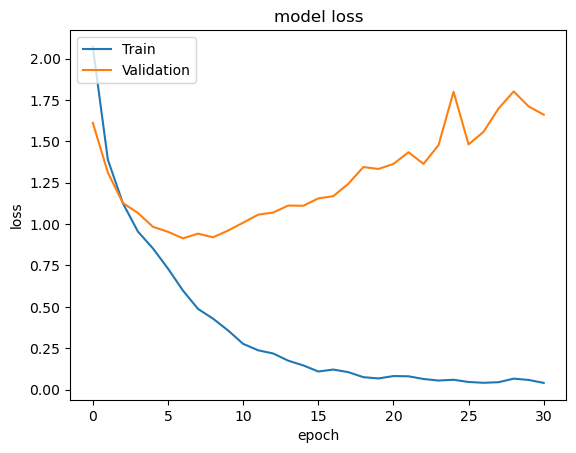

In [43]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
score = model.evaluate(X_valid, y_valid, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.660874605178833
Test accuracy:  0.695652186870575


In [47]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.7882252931594849
Test accuracy:  0.6896067261695862


In [71]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# 2. Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [73]:
print(cm)

[[ 13   0   0   1   4   1  25   0   0   0   1   2]
 [  0  63   2   0   0   1   0   0   1   0   3   6]
 [  0   4  38   1   1   4   2   0   3   0   5   4]
 [  0   0   0  91   0   3   1   1   2   2   0   2]
 [ 10   0   0   2  10   3  13   0   0   0   0   0]
 [  4   1   2   7   4  43  19   1   1   1   6   5]
 [ 21   0   0   0   7   4 102   0   0   1   2   4]
 [  0   0   0   6   0   0   0  28   3   0   1   4]
 [  3   1   2   4   2   7   2   1  62   9   0  12]
 [  0   0   1  11   1   6   0   2   9  19   7   0]
 [  0   3   2   1   0   2   2   2   0   3  95   4]
 [  2   1   0   2   1  15   5   0   5   1   0  41]]


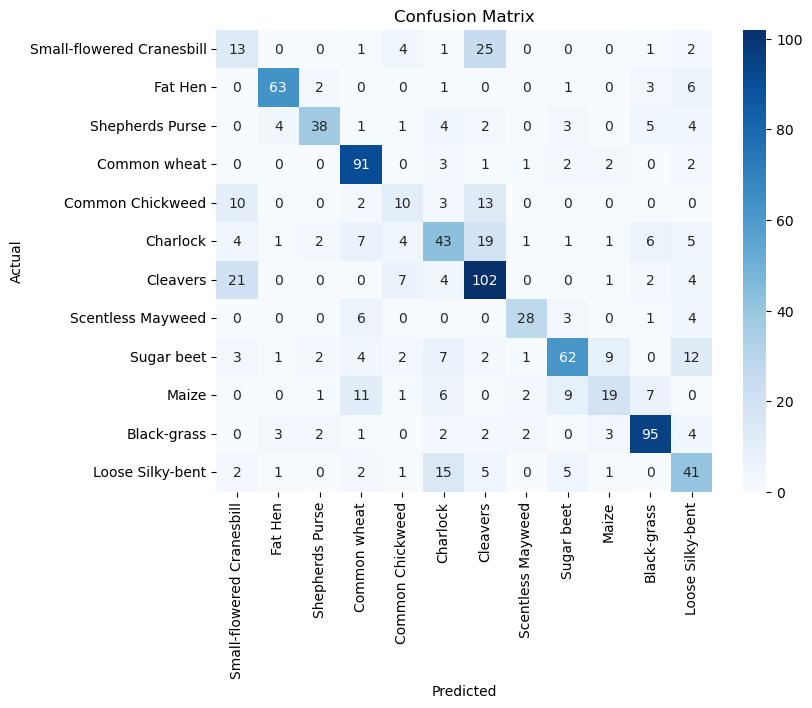

In [77]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,636 (14.14 MB)

 Trainable params: 3,706,636 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
np.save(r"C:\Users\jesse\OneDrive\Desktop\train_X", X_train) 

In [69]:
np.save(r"C:\Users\jesse\OneDrive\Desktop\train_y", y_train) 
np.save(r"C:\Users\jesse\OneDrive\Desktop\test_X", X_test) 
np.save(r"C:\Users\jesse\OneDrive\Desktop\test_y",y_test) 
np.save(r"C:\Users\jesse\OneDrive\Desktop\valid_X", X_valid) 
np.save(r"C:\Users\jesse\OneDrive\Desktop\valid_y", y_valid) 

In [47]:
import numpy as np


# Calculate the midpoint
midpoint = X_train.shape[0] // 4

# Select the first half of the rows
first_half = X_train[:midpoint]

print(first_half)

[[[[0.47843137 0.45882353 0.4745098 ]
   [0.6431373  0.6039216  0.6039216 ]
   [0.8        0.7764706  0.7647059 ]
   ...
   [0.41960785 0.40784314 0.42745098]
   [0.41568628 0.40392157 0.42352942]
   [0.45882353 0.45882353 0.45490196]]

  [[0.44705883 0.41568628 0.43529412]
   [0.61960787 0.58431375 0.58431375]
   [0.7764706  0.7490196  0.7372549 ]
   ...
   [0.41960785 0.40784314 0.41568628]
   [0.41568628 0.4        0.40392157]
   [0.41568628 0.40784314 0.4       ]]

  [[0.40784314 0.3764706  0.40784314]
   [0.5921569  0.5568628  0.54901963]
   [0.76862746 0.73333335 0.72156864]
   ...
   [0.4117647  0.39607844 0.40392157]
   [0.40784314 0.3882353  0.39215687]
   [0.4117647  0.4        0.39607844]]

  ...

  [[0.24313726 0.3137255  0.38039216]
   [0.22352941 0.29803923 0.38039216]
   [0.18039216 0.25882354 0.35686275]
   ...
   [0.27058825 0.36078432 0.4627451 ]
   [0.2784314  0.3764706  0.45882353]
   [0.3019608  0.39215687 0.46666667]]

  [[0.23529412 0.29803923 0.36078432]
   [0.2

In [49]:
np.save(r"C:\Users\jesse\OneDrive\Desktop\test_X", first_half) 